## Original model

In [1]:
import random as rd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


class BarabasiAlbertSimulation:
    '''
    An implementation of the Barabasi-Albert algorithm for
    constructing small-world graphs.
    '''

    def __init__(self, initial_nodes=5, new_node_degree=2):
        '''
        Inputs:

            initial_nodes (int) The number of nodes from which
              the small-world graph starts growing. A complete
              graph with this many nodes will be created when
              the initialize() method below is called.
              Default: 5.

            new_node_degree (int) Every new node that is added
              to the graph will be connected to this many nodes
              in the existing graph.
        '''
        if initial_nodes < new_node_degree:
            raise ValueError(
                'Need at least as many initial nodes (%r) as the new node degree (%r)' %
                (initial_nodes, new_node_degree))
        self.initial_nodes = initial_nodes
        self.new_node_degree = new_node_degree

    def initialize(self):
        '''
        Create a new graph for the simulation, using the model parameters.
        '''
        self.graph = nx.complete_graph(self.initial_nodes)
        self.layout = nx.spring_layout(self.graph)

    def observe(self):
        '''
        Update the matplotlib figure for the simulation visualization.
        '''
        plt.clf()
        # Plot network layout, color coding nodes by their degree
        plt.subplot(1, 2, 1)
        degree = np.array([self.graph.degree[i] for i in self.graph.nodes])
        nx.draw(
            self.graph, pos=self.layout,
            node_color=-degree, node_size = 100, alpha=0.8)
        plt.title('Nodes: ' + str(len(degree)))
        # Histogram of degrees of all nodes
        plt.subplot(1, 2, 2)
        plt.hist(degree, bins=12, range=(0.5, 12.5), rwidth=0.8)
        plt.title('Degree distribution')

    def pref_select(self, nodes):
        '''
        Select a random node from `nodes` with probability proportional to
        the degree of the node.
        '''
        degree = np.array([self.graph.degree[i] for i in nodes])
        cumulative = degree.cumsum()
        index = cumulative.searchsorted(np.random.uniform(0, cumulative[-1]))
        return nodes[index]

    def update(self):
        '''
        Add one new node to the existing graph and connect it to existing
        nodes using preferential attachment.
        '''
        nodes = list(self.graph.nodes)
        newcomer = max(nodes) + 1
        for i in range(self.new_node_degree):
            # Pick a target node using preferential attachment and remove
            # it from the `nodes` list so we can't pick it again.
            target = self.pref_select(nodes)
            self.graph.add_edge(newcomer, target)
            nodes.remove(target)
        # Update graph layout
        self.layout[newcomer] = (0, 0)
        self.layout = nx.spring_layout(self.graph, pos=self.layout)

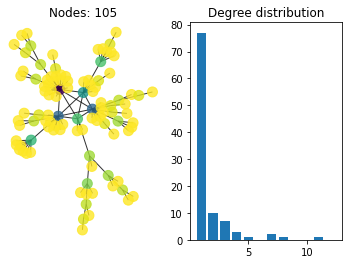

In [2]:
sim = BarabasiAlbertSimulation(new_node_degree=1)
sim.initialize()
for i in range(100):
    sim.update()
sim.observe()

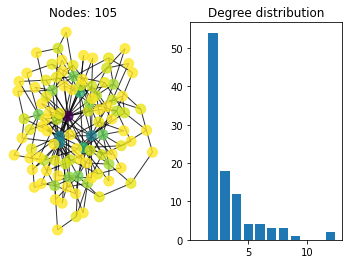

In [3]:
sim = BarabasiAlbertSimulation(new_node_degree=2)
sim.initialize()
for i in range(100):
    sim.update()
sim.observe()

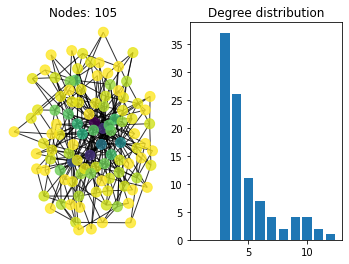

In [4]:
sim = BarabasiAlbertSimulation(new_node_degree=3)
sim.initialize()
for i in range(100):
    sim.update()
sim.observe()

## Modified model

In [5]:
import random as rd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


class BarabasiAlbertSimulation_mod:
    '''
    An implementation of the Barabasi-Albert algorithm for
    constructing small-world graphs.
    '''

    def __init__(self, initial_nodes=5, new_node_degree=2, prob=0.5):
        '''
        Inputs:

            initial_nodes (int) The number of nodes from which
              the small-world graph starts growing. A complete
              graph with this many nodes will be created when
              the initialize() method below is called.
              Default: 5.

            new_node_degree (int) Every new node that is added
              to the graph will be connected to this many nodes
              in the existing graph.
        '''
        if initial_nodes < new_node_degree:
            raise ValueError(
                'Need at least as many initial nodes (%r) as the new node degree (%r)' %
                (initial_nodes, new_node_degree))
        self.initial_nodes = initial_nodes
        self.new_node_degree = new_node_degree
        self.prob = prob #the percentage of times that we use pref select

    def initialize2(self):
        '''
        Create a new graph for the simulation, using the model parameters.
        '''
        self.graph = nx.complete_graph(self.initial_nodes)
        self.layout = nx.spring_layout(self.graph)

    def observe2(self):
        '''
        Update the matplotlib figure for the simulation visualization.
        '''
        plt.clf()
        # Plot network layout, color coding nodes by their degree
        plt.subplot(1, 2, 1)
        degree = np.array([self.graph.degree[i] for i in self.graph.nodes])
        nx.draw(
            self.graph, pos=self.layout,
            node_color=-degree, node_size = 100, alpha=0.8)
        plt.title('Nodes: ' + str(len(degree)))
        # Histogram of degrees of all nodes
        plt.subplot(1, 2, 2)
        plt.hist(degree, bins=12, range=(0.5, 12.5), rwidth=0.8)
        plt.title('Degree distribution')

    def pref_select2(self, nodes):
        '''
        Select a random node from `nodes` with probability proportional to
        the degree of the node.
        '''
        degree = np.array([self.graph.degree[i] for i in nodes])
        cumulative = degree.cumsum()
        index = cumulative.searchsorted(np.random.uniform(0, cumulative[-1]))
        return nodes[index]
    
    def norm_select(self, nodes):
        '''
        Select a random node from `nodes` with uniform probability
        '''
        index = nodes.index(np.random.choice(nodes))
        return nodes[index]
    
    def update2(self):
        '''
        Add one new node to the existing graph and connect it to existing
        nodes using preferential attachment.
        '''
        nodes = list(self.graph.nodes)
        newcomer = max(nodes) + 1
        prob = rd.random()
        if prob < self.prob: #use preferential select
            for i in range(self.new_node_degree):
                # Pick a target node using preferential attachment and remove
                # it from the `nodes` list so we can't pick it again.
                target = self.pref_select2(nodes)
                self.graph.add_edge(newcomer, target)
                nodes.remove(target)
        else: #use normal select
            for i in range(self.new_node_degree): 
                target = self.norm_select(nodes)
                self.graph.add_edge(newcomer, target)
                nodes.remove(target)
        # Update graph layout
        self.layout[newcomer] = (0, 0)
        self.layout = nx.spring_layout(self.graph, pos=self.layout)

#### Using probability of pref select of 0.5

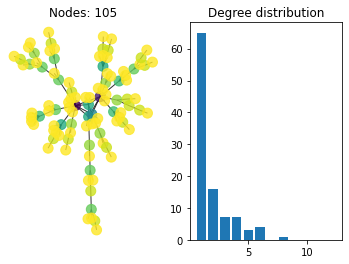

In [6]:
sim2 = BarabasiAlbertSimulation_mod(new_node_degree=1)
sim2.initialize2()
for i in range(100):
    sim2.update2()
sim2.observe2()

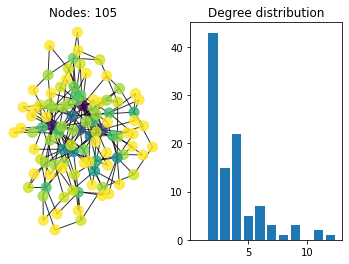

In [7]:
sim2 = BarabasiAlbertSimulation_mod(new_node_degree=2)
sim2.initialize2()
for i in range(100):
    sim2.update2()
sim2.observe2()

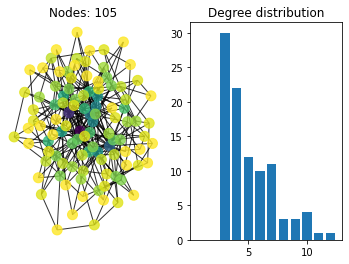

In [8]:
sim2 = BarabasiAlbertSimulation_mod(new_node_degree=3)
sim2.initialize2()
for i in range(100):
    sim2.update2()
sim2.observe2()

#### Using probability of pref select of 0.3

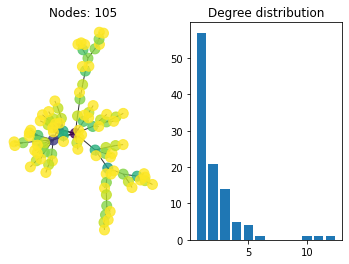

In [9]:
sim2 = BarabasiAlbertSimulation_mod(new_node_degree=1, prob=0.3)
sim2.initialize2()
for i in range(100):
    sim2.update2()
sim2.observe2()

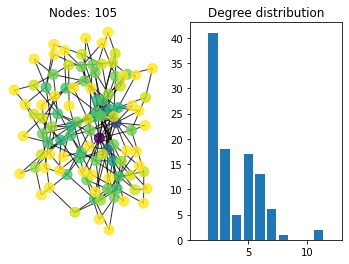

In [10]:
sim2 = BarabasiAlbertSimulation_mod(new_node_degree=2, prob=0.3)
sim2.initialize2()
for i in range(100):
    sim2.update2()
sim2.observe2()

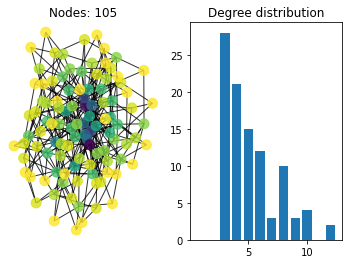

In [11]:
sim2 = BarabasiAlbertSimulation_mod(new_node_degree=3, prob=0.3)
sim2.initialize2()
for i in range(100):
    sim2.update2()
sim2.observe2()